# Feature Engineering on House Prices Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas.plotting import scatter_matrix

from scipy import stats

%matplotlib inline

In [2]:
train_data = pd.read_csv('data/train.csv')
# train_data.info()

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train_data.select_dtypes('object').describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [6]:
final_cols = train_data.columns.to_list()
final_cols.remove('Id')

## Converting Column

### Data Dictionary

In [7]:
data_dict = {
    'MSSubClass': [20,30,40,45,50, 60,70,75,80,85,90,120,150,160,180,190], 
    'MSZoning': ['A', 'C (all)', 'FV', 'I', 'RH', 'RL', 'RP', 'RM'], 
    'Street': ['None', 'Grvl', 'Pave'], 
    'Alley': ['None', 'Grvl', 'Pave'], 
    'LotShape': ['Reg','IR1', 'IR2', 'IR3'], 
    'LandContour': ['Lvl','Bnk', 'HLS','Low'], 
    'Utilities': ['AllPub','NoSewr','NoSeWa','ELO'],
    'LotConfig': ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'], 
    'LandSlope': ['Gtl', 'Mod', 'Sev'], 
    'Neighborhood': ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 
                     'Edwards', 'Gilbert','IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NoRidge', 
                     'NPkVill', 'NridgHt', 'NWAmes', 'OldTown','SWISU', 'Sawyer', 'SawyerW', 
                     'Somerst', 'StoneBr', 'Timber', 'Veenker'], 
    'Condition1': ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'], 
    'Condition2': ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'], 
    'BldgType': ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], 
    'HouseStyle': ['1Story', '1.5Fin', '1.5Unf', '2Story', '2.5Fin', '2.5Unf', 'SFoyer', 'SLvl'], 
    'OverallQual': np.arange(1,11), 
    'OverallCond': np.arange(1,11), 
    'RoofStyle': ['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed'], 
    'RoofMatl': ['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake', 'WdShngl'], 
    'Exterior1st': ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 
                   'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng','WdShing' ],
    'Exterior2nd': ['AsbShng', 'AsphShn', 'Brk Cmn', 'BrkFace', 'CBlock', 'CmentBd', 'HdBoard', 'ImStucc', 'MetalSd', 
                   'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'Wd Shng'],
    'MasVnrType': ['None', 'BrkCmn', 'BrkFace', 'CBlock', 'Stone'], 
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd','Ex'], 
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd','Ex'], 
    'Foundation': ['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'], 
    'BsmtQual': ['None','Po', 'Fa', 'TA', 'Gd','Ex'],
    'BsmtCond': ['None','Po', 'Fa', 'TA', 'Gd','Ex'], 
    'BsmtExposure': ['None', 'No', 'Mn', 'Av', 'Gd'], 
    'BsmtFinType1': ['None', 'GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf'],
    'BsmtFinType2': ['None', 'GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf'],
    'Heating': ['Floor', 'GasA', 'GasW', 'Grav', 'OthW', 'Wall'], 
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd','Ex'],
    'CentralAir': ['N', 'Y'],
    'Electrical': ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'], 
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd','Ex'],
    'Functional': ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'], 
    'FireplaceQu': ['None','Po', 'Fa', 'TA', 'Gd','Ex'],
    'GarageType': ['None', '2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd'],
    'GarageFinish': ['None', 'Fin', 'RFn', 'Unf'],
    'GarageQual': ['None', 'Po', 'Fa', 'TA', 'Gd','Ex'],
    'GarageCond': ['None', 'Po', 'Fa', 'TA', 'Gd','Ex'],
    'PavedDrive': ['N', 'P', 'Y'], 
    'PoolQC':  ['None', 'Fa', 'TA', 'Gd','Ex'], 
    'Fence': ['None', 'GdPrv', 'MnPrv', 'GdWo', 'MnWw'], 
    'MiscFeature': ['None', 'Elev', 'Gar2', 'Othr', 'Shed', 'TenC'],
    'SaleType': ['WD', 'CWD', 'VWD', 'New', 'COD', 'Con', 'ConLw', 'ConLI', 'ConLD','Oth'], 
    'SaleCondition': ['Normal', 'Abnorml', 'AdjLand', 'Alloca', 'Family', 'Partial'], 
    'BsmtFullBath': np.arange(0,4), 
    'BsmtHalfBath': np.arange(0, 3),
    'FullBath': np.arange(0,5),
    'HalfBath': np.arange(0,3), 
    'BedroomAbvGr': np.arange(0,9),
    'KitchenAbvGr' : np.arange(0,4), 
    'TotRmsAbvGrd' : np.arange(0, 16), 
    'Fireplaces' : np.arange(0,5), 
    'GarageCars' : np.arange(0,6), 
    'MoSold' : np.arange(1,13)
   
}

order_cat = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 
             'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 
             'HeatingQC', 'CentralAir', 'KitchenQual','FireplaceQu',
             'GarageQual', 'GarageCond', 'GarageCars', 'GarageFinish'
             'PoolQC']

# year is categorical variable becuase it makes no sense to add two years. 
# Also house build in 2010 is better than the one built in 1980

year_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold'] 

len(data_dict.keys()) , len(order_cat), len(year_cols)

(56, 17, 5)

In [8]:
cat_cols = train_data.select_dtypes('object').columns.values

# columns that are categorical but not object type
additional_cat = [key for key in data_dict.keys() if key not in cat_cols]
cat_cols = np.concatenate((cat_cols, additional_cat))
cat_cols

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass',
       'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold'], dtype=object)

In [9]:
## convert type and also add order 
for col in cat_cols:
    is_ordered = True if col in order_cat else False
    train_data[col] = pd.Categorical(train_data[col], categories=data_dict[col], ordered=is_ordered)

# add categories for year columns
for col in year_cols:
    train_data[col] = pd.Categorical(train_data[col], ordered=True)
    
train_data.select_dtypes('category').describe()    

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
count,1460,1460,1460,91,1460,1460,1460,1460,1460,1460,...,1379,1379,1460,7,281,54,1460,1460,1460,1460
unique,15,5,2,2,4,4,2,5,3,25,...,5,5,3,3,4,4,12,5,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,TA,TA,Y,Gd,MnPrv,Shed,6,2009,WD,Normal
freq,536,1151,1454,50,925,1311,1459,1052,1382,225,...,1311,1326,1340,3,157,49,253,338,1267,1198


In [10]:
train_data['YrSold'].min(), train_data['OverallQual'].max(), train_data['ExterQual'].min(), train_data['ExterQual'].max()

(2006, 10, 'Fa', 'Ex')

## Outliers 

In [11]:
train_data = train_data.drop(index = train_data[train_data['SalePrice'] > 400000].index, axis=0)
train_data = train_data.drop(index = train_data[train_data['LotFrontage'] > 200].index, axis=0)
train_data = train_data.drop(index = train_data[train_data['GrLivArea'] > 4000].index, axis=0)
train_data.shape

(1429, 81)

## Adding new features

In [12]:
train_data['is_new_house'] = np.where(train_data['YearBuilt'] > 2000 , 1, 0)
train_data['is_recent_remolding'] = np.where(train_data['YearRemodAdd'] > 2000 , 1, 0)
train_data['basement_has_full_bathroom'] = np.where(train_data['BsmtFullBath'].cat.codes > 0, 1, 0) 
train_data['has_fireplace'] = np.where(train_data['Fireplaces'].cat.codes > 0, 1, 0) 
train_data['is_recent_garage_built'] = np.where(train_data['GarageYrBlt'] > 2000 , 1, 0)
train_data['has_garage'] = np.where(train_data['GarageYrBlt'].isnull() , 0, 1)
train_data['has_pool'] = np.where(train_data['PoolArea'] > 0, 1, 0)

# convert to categories
for c in ['is_new_house', 'is_recent_remolding', 'basement_has_full_bathroom', 'has_fireplace',
                  'is_recent_garage_built', 'has_garage', 'has_pool']:
    train_data[c] = pd.Categorical(train_data[c])

## add columns in final cols
final_cols.extend(['is_new_house', 'is_recent_remolding', 'basement_has_full_bathroom', 'has_fireplace',
                  'is_recent_garage_built', 'has_garage', 'has_pool'])

## Column Transformation


In [13]:
train_data['SalePrice'] = np.log(train_data['SalePrice'])

## Filling Missing Values


In [14]:
# train_data['Utilities'].value_counts()

In [15]:
train_data['LotFrontage'].fillna(train_data['LotFrontage'].median(), inplace=True)
train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].median(), inplace=True)

train_data['PoolQC'].fillna('None', inplace=True)
train_data['MiscFeature'].fillna('None', inplace=True)
train_data['Alley'].fillna('None', inplace=True)
train_data['Fence'].fillna('None', inplace=True)
train_data['FireplaceQu'].fillna('None', inplace=True)

train_data['GarageCond'].fillna('None', inplace=True)
train_data['GarageType'].fillna('None', inplace=True)

# houses who have no garage; so year really does not matter. Set the year to the year the house was built
train_data['GarageYrBlt'] = np.where( train_data['GarageYrBlt'].isnull(), train_data['YearBuilt'], train_data['GarageYrBlt'])

train_data['GarageFinish'].fillna('None', inplace=True)
train_data['GarageQual'].fillna('None', inplace=True)

train_data['BsmtExposure'].fillna('None', inplace=True)
train_data['BsmtFinType2'].fillna('None', inplace=True)
train_data['BsmtFinType1'].fillna('None', inplace=True) 
train_data['BsmtCond'].fillna('None', inplace=True)
train_data['BsmtQual'].fillna('None', inplace=True)

train_data['MasVnrType'].fillna('None', inplace=True) 
train_data['Electrical'].fillna('SBrkr', inplace=True) # mode
train_data['Utilities'].fillna('AllPub', inplace=True) # mode


In [16]:
train_data.isnull().sum().sum()


0

## Binning 
- Equal width binning 

In [17]:
for col in year_cols:
    print(col , ' --> ', train_data[col].min(), train_data[col].max(), train_data[col].max() - train_data[col].min())

YearBuilt  -->  1872 2010 138
YearRemodAdd  -->  1950 2010 60
GarageYrBlt  -->  1872.0 2010.0 138.0
YrSold  -->  2006 2010 4
MoSold  -->  1 12 11


In [18]:
yr_built_bins = [1872, 1950, 1975, 2000, 2025]
yr_built_bins_interval = pd.IntervalIndex.from_breaks(yr_built_bins, closed ='left')
train_data['bin_yr_built'] = pd.cut(train_data['YearBuilt'], bins=yr_built_bins_interval, precision=0)

final_cols.append('bin_yr_built') 
final_cols.remove('YearBuilt')
# train_data['bin_yr_built'].value_counts()

In [19]:
yr_remod_bins = [1950, 1980, 1990, 2000, 2025]
yr_remod_bins_interval = pd.IntervalIndex.from_breaks(yr_remod_bins, closed ='left')
train_data['bin_yr_remod'] = pd.cut(train_data['YearRemodAdd'], bins=yr_remod_bins_interval, precision=0)

final_cols.append('bin_yr_remod') 
final_cols.remove('YearRemodAdd')

# train_data['bin_yr_remod'].value_counts()

In [20]:
yr_garage_bins = [1872, 1950, 1980, 1990, 2000,2025]
yr_garage_bins_interval = pd.IntervalIndex.from_breaks(yr_garage_bins, closed ='left')
train_data['bin_garage_built'] = pd.cut(train_data['GarageYrBlt'], bins=yr_garage_bins_interval, precision=0)

final_cols.append('bin_garage_built') 
final_cols.remove('GarageYrBlt')

# train_data['bin_garage_built'].value_counts()

In [21]:
yr_sold_bins = [2006, 2007, 2008, 2009, 2025]
yr_sold_bins_interval = pd.IntervalIndex.from_breaks(yr_sold_bins, closed ='left')
train_data['bin_yr_sold'] = pd.cut(train_data['YrSold'], bins=yr_sold_bins_interval , precision=0)

final_cols.append('bin_yr_sold') 
final_cols.remove('YrSold')

# train_data['bin_yr_sold'].value_counts()

In [22]:
# seperating it in four seasons
month_sold_bins = [1, 4, 6, 9, 13]
month_sold_bins_interval = pd.IntervalIndex.from_breaks(month_sold_bins, closed ='left')
train_data['bin_mo_sold'] = pd.cut(train_data['MoSold'], bins=month_sold_bins_interval, precision=0)

final_cols.append('bin_mo_sold') 
final_cols.remove('MoSold')

# train_data['bin_mo_sold'].value_counts()

In [23]:
train_data.isnull().sum().sum()

0

## Multicolinear columns

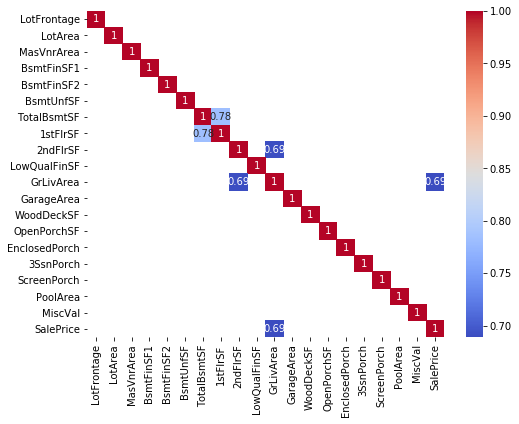

In [24]:
corr_matrix = train_data[final_cols].corr()
mask = corr_matrix < 0.65
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(corr_matrix, mask = mask, annot=True, cmap='coolwarm')

In [25]:
multi_colinear_cols = ['1stFlrSF', '2ndFlrSF']

for col in multi_colinear_cols: 
    final_cols.remove(col)

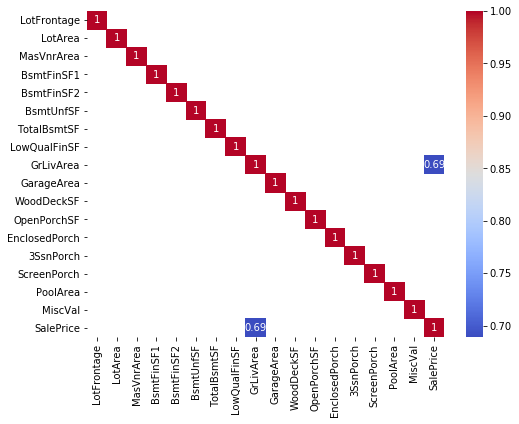

In [26]:
corr_matrix = train_data[final_cols].corr()
mask = corr_matrix < 0.65
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(corr_matrix, mask = mask, annot=True, cmap='coolwarm')

In [27]:
train_data.shape, len(final_cols)

((1429, 93), 85)

In [28]:
[c for c in train_data.columns if c not in final_cols ]

['Id',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 '2ndFlrSF',
 'GarageYrBlt',
 'MoSold',
 'YrSold']

In [29]:
[c for c in final_cols if c not in train_data.columns ]

[]

## Categorical Encoding 
- One-hot Encoding of all categorical variables with na dropped and kept 


In [30]:
'''
    Convert given categorical columns to one-hot encoded columns
    drop 'NAN' column to avoid dummy variable trap
    drop categorical columns after 1-hot encoding 
    
    dummy_trap = True --> delete the first dummy variable, incase a column has 'None', it'll be the first column; 
        if column has null values then delete NA 
        if column has 1/0 value then delete 0 column
        
        Na and 0 signify lack of something 
'''

def get_one_hot_encoded_X(X, cat_colums, dummy_trap=True, delete_original_cat= True):

    for col in cat_colums:
        
        temp = pd.get_dummies(X[col], prefix=col, dummy_na= False, drop_first=dummy_trap)
        X = X.join(temp)

    if delete_original_cat:    
        X = X.drop(cat_colums, axis =1)   
        
    return X  

In [31]:
train = train_data[final_cols]
train.shape

(1429, 85)

In [32]:
cat_cols_final = train_data[final_cols].select_dtypes('category').columns
cat_cols_final.shape

(67,)

In [33]:
train_regression_data = get_one_hot_encoded_X(train, cat_cols_final, dummy_trap= True, delete_original_cat= True)
train_tree_data = get_one_hot_encoded_X(train, cat_cols_final, dummy_trap= False, delete_original_cat= True)

train.shape, train_regression_data.shape, train_tree_data.shape

((1429, 85), (1429, 362), (1429, 429))

# Save 

In [34]:
#save data to file

pd.to_pickle(train_regression_data, 'data/train_regression_data_06.pkl')
pd.to_pickle(train_tree_data, 'data/train_tree_data_06.pkl')
pd.to_pickle(train, 'data/train_catboost_data_06.pkl')
pd.to_pickle(final_cols, 'data/final_cols_06.pkl')
pd.to_pickle(data_dict, 'data/data_dict_06.pkl')

In [35]:
train['BsmtFullBath'].mode()

0    0
Name: BsmtFullBath, dtype: category
Categories (4, int64): [0, 1, 2, 3]

In [36]:
train['BsmtHalfBath'].mode()

0    0
Name: BsmtHalfBath, dtype: category
Categories (3, int64): [0, 1, 2]

In [37]:
train['KitchenQual'].mode()

0    TA
Name: KitchenQual, dtype: category
Categories (5, object): [Po < Fa < TA < Gd < Ex]

In [38]:
train['Functional'].mode()

0    Typ
Name: Functional, dtype: category
Categories (8, object): [Typ, Min1, Min2, Mod, Maj1, Maj2, Sev, Sal]

In [41]:
train['GarageCars'].mode()

0    2
Name: GarageCars, dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

In [42]:
train['GarageCars'].value_counts()

2    821
1    369
3    153
0     81
4      5
5      0
Name: GarageCars, dtype: int64

In [43]:
train['SaleType'].value_counts()

WD       1254
New       105
COD        43
ConLD       9
ConLw       5
ConLI       4
CWD         4
Oth         3
Con         2
VWD         0
Name: SaleType, dtype: int64